In [61]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('elapsed-time-control-group.csv')
df

,vms,elapsed
0,20,40.1
1,30,63.1
2,40,97.3
3,40,100.0
4,50,105.3


In [63]:
df.corr()

,vms,elapsed
vms,1.000000,0.962207
elapsed,0.962207,1.000000


In [64]:
df = df.dropna() # drop all rows that have NAN/none

In [65]:
x = torch.FloatTensor(df[['vms']].values) # 특성 데이터
y = torch.FloatTensor(df[['elapsed']].values) # 라벨

In [66]:
model = Sequential()
model.add_module('nn1', Linear(1,1))
list(model.parameters())

[Parameter containing:
 tensor([[-0.2250]], requires_grad=True),
 Parameter containing:
 tensor([0.6305], requires_grad=True)]

In [67]:
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), lr=0.1)

In [68]:
hist = []
for step in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x) # w*x+b # hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(step, cost.item())
    hist.append(cost.item())

0 8614.486328125
1 7918.94677734375
2 7253.73193359375
3 6619.32666015625
4 6016.140625
5 5444.4990234375
6 4904.63720703125
7 4396.68896484375
8 3920.68310546875
9 3476.53369140625
10 3064.03564453125
11 2682.85693359375
12 2332.53564453125
13 2012.4755859375
14 1721.946533203125
15 1460.0809326171875
16 1225.878662109375
17 1018.2097778320312
18 835.8206787109375
19 677.3445434570312
20 541.3109741210938
21 426.1612243652344
22 330.26373291015625
23 251.93319702148438
24 189.45034790039062
25 141.0835723876953
26 105.11087799072266
27 79.8427505493164
28 63.64338302612305
29 54.95185089111328
30 52.300209045410156
31 54.329917907714844
32 59.805274963378906
33 67.62310028076172
34 76.81922912597656
35 86.57157897949219
36 96.19908142089844
37 105.15826416015625
38 113.0361557006836
39 119.54105377197266
40 124.4912109375
41 127.80216217041016
42 129.47303771972656
43 129.5724639892578
44 128.22369384765625
45 125.59232330322266
46 121.8719482421875
47 117.27314758300781
48 112.012802

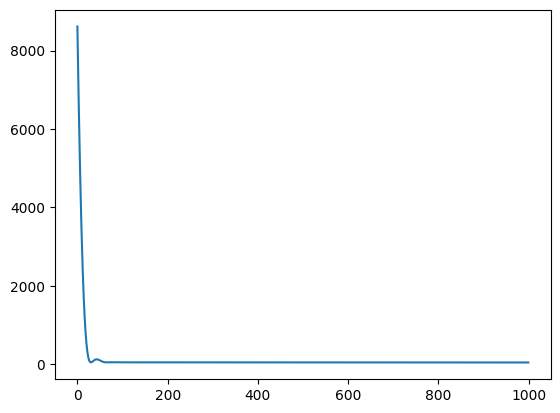

In [69]:
plt.plot(hist)
plt.show()

In [70]:
model[0].weight

Parameter containing:
tensor([[2.2864]], requires_grad=True)

In [71]:
model[0].bias

Parameter containing:
tensor([-0.8567], requires_grad=True)

In [72]:
# model( torch.FloatTensor([[15]]))
pred = model(x).detach().numpy()

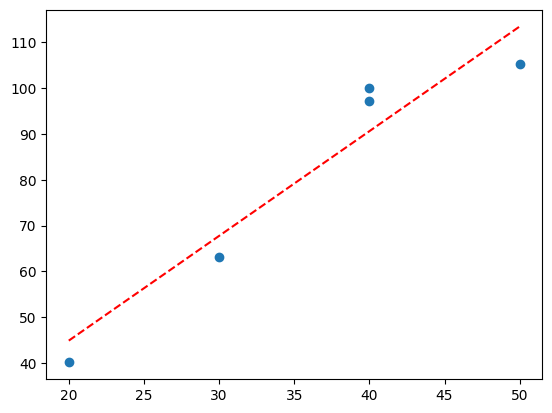

In [73]:
plt.scatter(x, y)
plt.plot(x, pred, 'r--') # r-- : Red, dashed line
plt.show()